In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt

### Load data

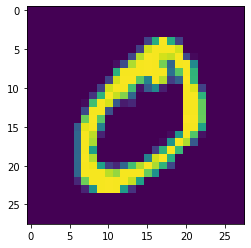

Classification label: 0


In [3]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[1].reshape(28, 28, 1))
plt.show()
print('Classification label:', train_labels[1])

### Standardize data

In [4]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
print(train_images.shape)

# one-hot encoding
# zero,	  one,	    two
# 1,		0,		0
# 0,		1,		0
# 0,		0,		1
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

(60000, 28, 28, 1)


### Create Model

In [5]:
model = keras.models.Sequential()
# input layer
model.add(keras.layers.Flatten(input_shape=(28, 28)))
# hidden layer
model.add(keras.layers.Dense(25, activation='relu'))
# output layer
model.add(keras.layers.Dense(10, activation='softmax'))

2022-04-22 19:06:13.900811: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 19:06:13.906050: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 19:06:13.906164: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 19:06:13.906474: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

### Train Model

In [8]:
EPOCHS = 7
BATCH_SIZE = 16

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_split=0.2, verbose=1, shuffle=True)

model.save('my_model.h5')

Epoch 1/7
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0548 - acc: 0.9833 - val_loss: 0.1819 - val_acc: 0.9571
Epoch 2/7
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0528 - acc: 0.9836 - val_loss: 0.1738 - val_acc: 0.9581
Epoch 3/7
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0515 - acc: 0.9840 - val_loss: 0.1812 - val_acc: 0.9584
Epoch 4/7
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0496 - acc: 0.9846 - val_loss: 0.1814 - val_acc: 0.9572
Epoch 5/7
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0479 - acc: 0.9855 - val_loss: 0.2122 - val_acc: 0.9507
Epoch 6/7
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0449 - acc: 0.9860 - val_loss: 0.1808 - val_acc: 0.9583
Epoch 7/7
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0451 - acc: 0.9863 - val_loss: 0.1938 - val_acc: 0.9583


### Plot results

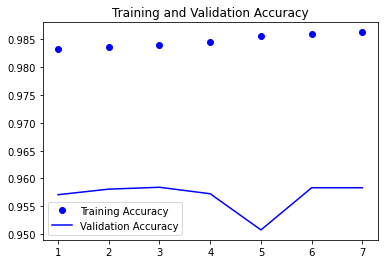

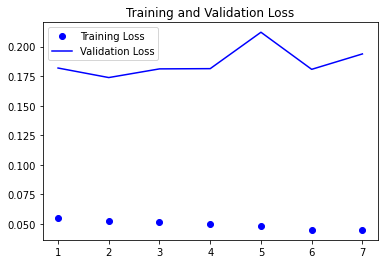

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### Test Model

313/313 [==============================] - 0s 1ms/step - loss: 0.1726 - acc: 0.9591
0.9591000080108643


/home/lawangin/miniconda3/envs/NumberClassify/lib/python3.10/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


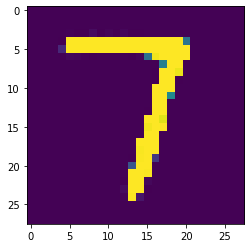

Before expanding dims: (28, 28, 1)
After expanding dims: (1, 28, 28, 1)
predict: [3]


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

img_width, img_height = 28, 28
img = load_img('num7.jpg', True, target_size=(img_width, img_height))

plt.imshow(img)
plt.show()

img_arr = img_to_array(img)
print('Before expanding dims:', img_arr.shape)
img_arr = np.expand_dims(img_arr, axis=0)
print('After expanding dims:', img_arr.shape)

pred_range = model.predict(img_arr).argmax(axis=1)
print('predict:', pred_range)